<a href="https://colab.research.google.com/github/sandeepbhaisora/covid-19-analysis/blob/master/covid-19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import requests
import pandas as pd
import json
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import datetime as dt

In [0]:
url = "https://api.covid19india.org/data.json"


In [0]:
response = requests.get(url=url)
response = json.loads(response.text)
cases =  response.get("cases_time_series")


In [0]:
pd.read_json(json.dumps(cases)).to_csv('cases.csv')

In [0]:
df =  pd.read_csv('cases.csv')

In [139]:
fig = px.line(df, x = 'date', y = 'dailyconfirmed', title='Daily cases confirmed')
fig.show()

In [140]:
df.shape

(81, 8)

In [126]:
df.describe

<bound method NDFrame.describe of     Unnamed: 0  dailyconfirmed  ...  totaldeceased  totalrecovered
0            0               1  ...              0               0
1            1               0  ...              0               0
2            2               0  ...              0               0
3            3               1  ...              0               0
4            4               1  ...              0               0
..         ...             ...  ...            ...             ...
76          76             886  ...            422            1509
77          77            1061  ...            448            1767
78          78             922  ...            486            2040
79          79            1371  ...            521            2466
80          80            1580  ...            559            2854

[81 rows x 8 columns]>

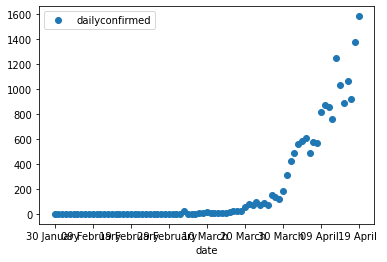

In [127]:
plt = df.plot(x='date', y='dailyconfirmed', style='o')  

In [0]:
date =  df.get("date")
daily_confirmed = df.get("dailyconfirmed")

In [144]:
for i in range(len(date)):
  date[i] = date[i] + '2020'
print(date)

0      30 January 2020
1      31 January 2020
2     01 February 2020
3     02 February 2020
4     03 February 2020
            ...       
76       15 April 2020
77       16 April 2020
78       17 April 2020
79       18 April 2020
80       19 April 2020
Name: date, Length: 81, dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
date = pd.to_datetime(date).map(dt.datetime.toordinal)

In [0]:
date =date.values.reshape(-1,1)

In [0]:
date_train, date_test, daily_confirmed_train, daily_confirmed_test = train_test_split(date, daily_confirmed, test_size=0.2, random_state=0)

In [148]:

regressor = LinearRegression()  
regressor.fit(date_train, daily_confirmed_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
print(regressor.intercept_)

-8941973.464967586


In [150]:
print(regressor.coef_)


[12.12511324]


In [0]:
daily_confirmed_pred = regressor.predict(date_test)

In [0]:
df = pd.DataFrame({'Actual': daily_confirmed_test.values.flatten(), 'Predicted': daily_confirmed_pred.flatten()})

In [156]:
df

,Actual,Predicted
0,0,6.546891
1,0,67.172457
2,309,479.426307
3,0,-102.579129
4,871,600.677439
5,1243,637.052779
6,0,103.547797
7,86,406.675628
8,94,382.425401
9,0,55.047344
